BAX-493B

6/2/2021


# Load in Tensorflow and Keras
---

Download Lung Images from https://www.kaggle.com/tawsifurrahman/covid19-radiography-database

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q -U keras keras-tuner keras-applications

     |████████████████████████████████| 71kB 5.5MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 


In [ ]:
# Load & Import packages. 
import os
import kerastuner as kt
from tensorflow import keras
import tensorflow as tf
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameter as hp
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten
from keras.models import Sequential 
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras.applications.vgg19 import VGG19
from keras import layers
from keras.preprocessing import image
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [ ]:
# Load in data that we have imported to our Shared Google Drive.
PATH = r'/content/drive/Shareddrives/BAX493b Team Project/data-radiography/COVID-19_Radiography_Dataset'

train_data = defect_tree = tf.keras.preprocessing.image_dataset_from_directory(
    PATH,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(244, 244),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
)
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    PATH,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(244, 244),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
)

Found 15153 files belonging to 3 classes.
Using 12123 files for training.
Found 15153 files belonging to 3 classes.
Using 3030 files for validation.


In [ ]:
# Define our three classes as Covid-19, normal, and viral pneumonia.
class_names =  ["COVID-19","NORMAL","Viral Pneumonia"]
for i in range(len(class_names)):
    print(class_names[i] ," " , i)

COVID-19   0
NORMAL   1
Viral Pneumonia   2


## Visualize Data

Viral Pneumonia


(-0.5, 243.5, 243.5, -0.5)

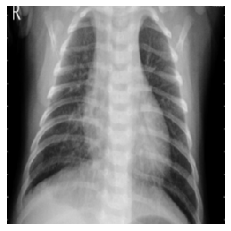

In [ ]:
# Test: Visualize one of our Pneumonia images.
image_path = PATH + "/Viral Pneumonia/Viral Pneumonia-1024.png"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
print("Viral Pneumonia")
plt.imshow(new_img)
plt.axis('off')

NORMAL


(-0.5, 243.5, 243.5, -0.5)

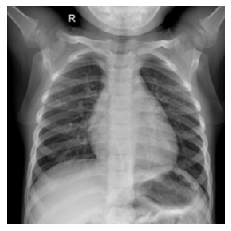

In [ ]:
# Test: Visualize one of our normal lung images.
image_path = PATH + "/Normal/Normal-1013.png"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
print("NORMAL")
plt.imshow(new_img)
plt.axis('off')

COVID-19


(-0.5, 243.5, 243.5, -0.5)

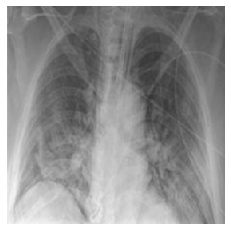

In [ ]:
# Test: Visualize one of our COVID images.
image_path = PATH + "/COVID/COVID-123.png"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
print("COVID-19")
plt.imshow(new_img)
plt.axis('off')

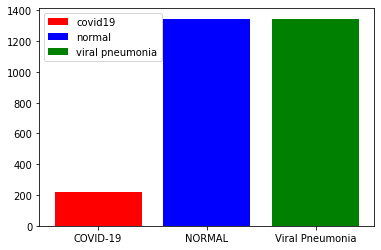

In [ ]:
# Visualize the count of our data - we observe that our dataset is unbalanced.
fig, ax = plt.subplots()
ax.bar("COVID-19",219,color="r",label="covid19")
ax.bar("NORMAL",1341,color="b",label="normal")
ax.bar("Viral Pneumonia",1345,color="g",label="viral pneumonia")
ax.legend()


## Create Model

In [ ]:
# Create our CNN & Define layers. Use batch normalization. 
model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(3, activation= 'softmax')
])

In [ ]:
# Add early stopping to avoid overfitting.
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [ ]:
# Use 'adam' optimizer to compile & optimize model. 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Fit our model using 5 Epochs.
history=model.fit(
    train_data,
    validation_data= test_data,
    batch_size=256*2,
    epochs = 5,
    callbacks=[early]
)

Epoch 1/5
379/379 [==============================] - 3844s 10s/step - loss: 0.5650 - accuracy: 0.8151 - val_loss: 0.3035 - val_accuracy: 0.8881
Epoch 2/5
379/379 [==============================] - 58s 151ms/step - loss: 0.2591 - accuracy: 0.8989 - val_loss: 0.2146 - val_accuracy: 0.9198
Epoch 3/5
379/379 [==============================] - 57s 150ms/step - loss: 0.1912 - accuracy: 0.9253 - val_loss: 0.1643 - val_accuracy: 0.9416
Epoch 4/5
379/379 [==============================] - 57s 150ms/step - loss: 0.1317 - accuracy: 0.9487 - val_loss: 0.1617 - val_accuracy: 0.9436
Epoch 5/5
379/379 [==============================] - 58s 151ms/step - loss: 0.1000 - accuracy: 0.9644 - val_loss: 0.1469 - val_accuracy: 0.9548


In [ ]:
#evaluate model
model.evaluate(test_data)

95/95 [==============================] - 9s 87ms/step - loss: 0.1560 - accuracy: 0.9475


[0.15595059096813202, 0.9475247263908386]

# Visualizations

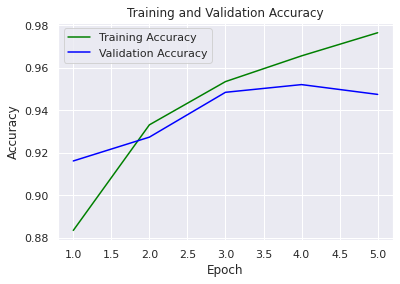

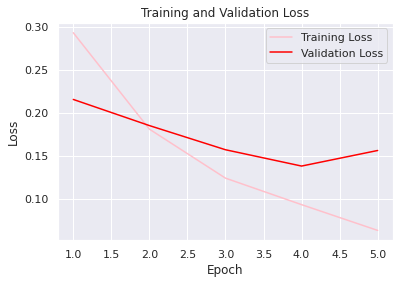

In [ ]:
# Use pyplot to plot accuracy and test loss. 
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Plot accuracy
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()


# Plot Loss
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

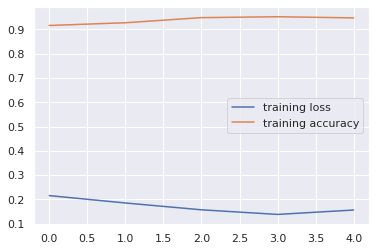

In [ ]:
# For training data: Accuracy and loss.
plt.plot(history.history['val_loss'], label = 'training loss')
plt.plot(history.history['val_accuracy'], label = 'training accuracy')
plt.legend()

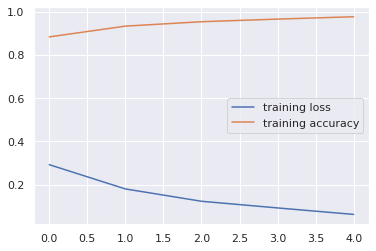

In [ ]:
# For test data: Accuracy and loss.
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.legend()

[0]
COVID-19


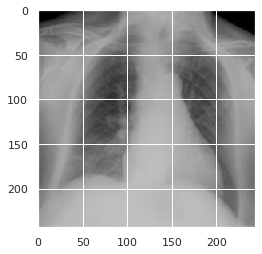

In [ ]:
# Example Image 1: Covid lung image.
image_path = PATH + "/COVID/COVID-104.png"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

[1]
NORMAL


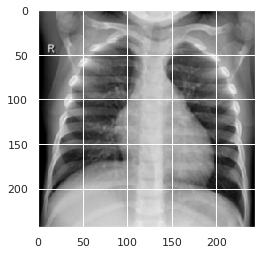

In [ ]:
# Example Image 2: Normal Lung Image.
image_path = PATH + "/Normal/Normal-1002.png"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

[2]
Viral Pneumonia


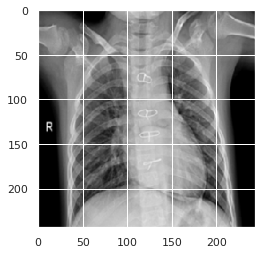

In [ ]:
# Example Image 3: Pneumonia Lung Image.
image_path = PATH + "/Viral Pneumonia/Viral Pneumonia-1002.png"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

In [ ]:
# Save / Write to Json file.
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
   
 
# Save weights as model.h5.

model.save("model.h5")